In [ ]:
# Some jupyter notebook magic to reload modules automatically when they change
# not necessary for this specific notebook but useful in general
%load_ext autoreload
%autoreload 2

# Gives you high resolution images within the notebook
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data


In [ ]:
from definitions import ROOT_DIR
import os

# The PSDM specific input models can be imported from the pypsdm.models.input and
# pypsdm.models.result. The `GridWithResults` container is located in pypsdm.models.gwr
from pypsdm.models.gwr import GridWithResults


grid_path = os.path.join(ROOT_DIR, "tests", "resources", "simbench", "input")
result_path = os.path.join(ROOT_DIR, "tests", "resources", "simbench", "results")
# IO data models in general have a from_csv method to parse psdm files
gwr = GridWithResults.from_csv(grid_path, result_path)

2025-08-12 19:17:15.959 | INFO     | pypsdm.models.gwr:from_csv:293 - Reading grid from /home/smdafeis/github/pypsdm/tests/resources/simbench/input
2025-08-12 19:17:16.377 | DEBUG    | pypsdm.models.primary_data:from_csv:273 - No primary data in path /home/smdafeis/github/pypsdm/tests/resources/simbench/input
2025-08-12 19:17:16.378 | INFO     | pypsdm.models.gwr:from_csv:305 - Reading results from /home/smdafeis/github/pypsdm/tests/resources/simbench/results
2025-08-12 19:17:16.995 | WARNING  | pypsdm.models.result.participant.dict:from_csv:76 - Entity 557b9f51-d83c-476c-a84c-d240530c203d not in input entities
2025-08-12 19:17:17.000 | WARNING  | pypsdm.models.result.participant.dict:from_csv:76 - Entity 5d50a881-c383-463e-8355-41b3dd57422d not in input entities


## Grid Plots


In [ ]:
from pypsdm.plots.common.utils import PURPLE, RED, YELLOW
from pypsdm.plots.grid import grid_plot

# Use the grid_plot method to visualize the grid model
# only works if the underlying node input files have associated coordinates

# You can highlight nodes and lines in different colors
lines = gwr.lines.uuid.to_list()[0:3]
nodes = gwr.nodes.uuid.to_list()[0:3]

line_highlights = {
    RED: lines[0:2],
    PURPLE: lines[2::],
}
node_highlights = {YELLOW: nodes}

grid_plot(gwr.grid, line_highlights=line_highlights, node_highlights=node_highlights)

## Simple Power Plots


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Active power'}, xlabel='Day of Week', ylabel='Power in kW'>)

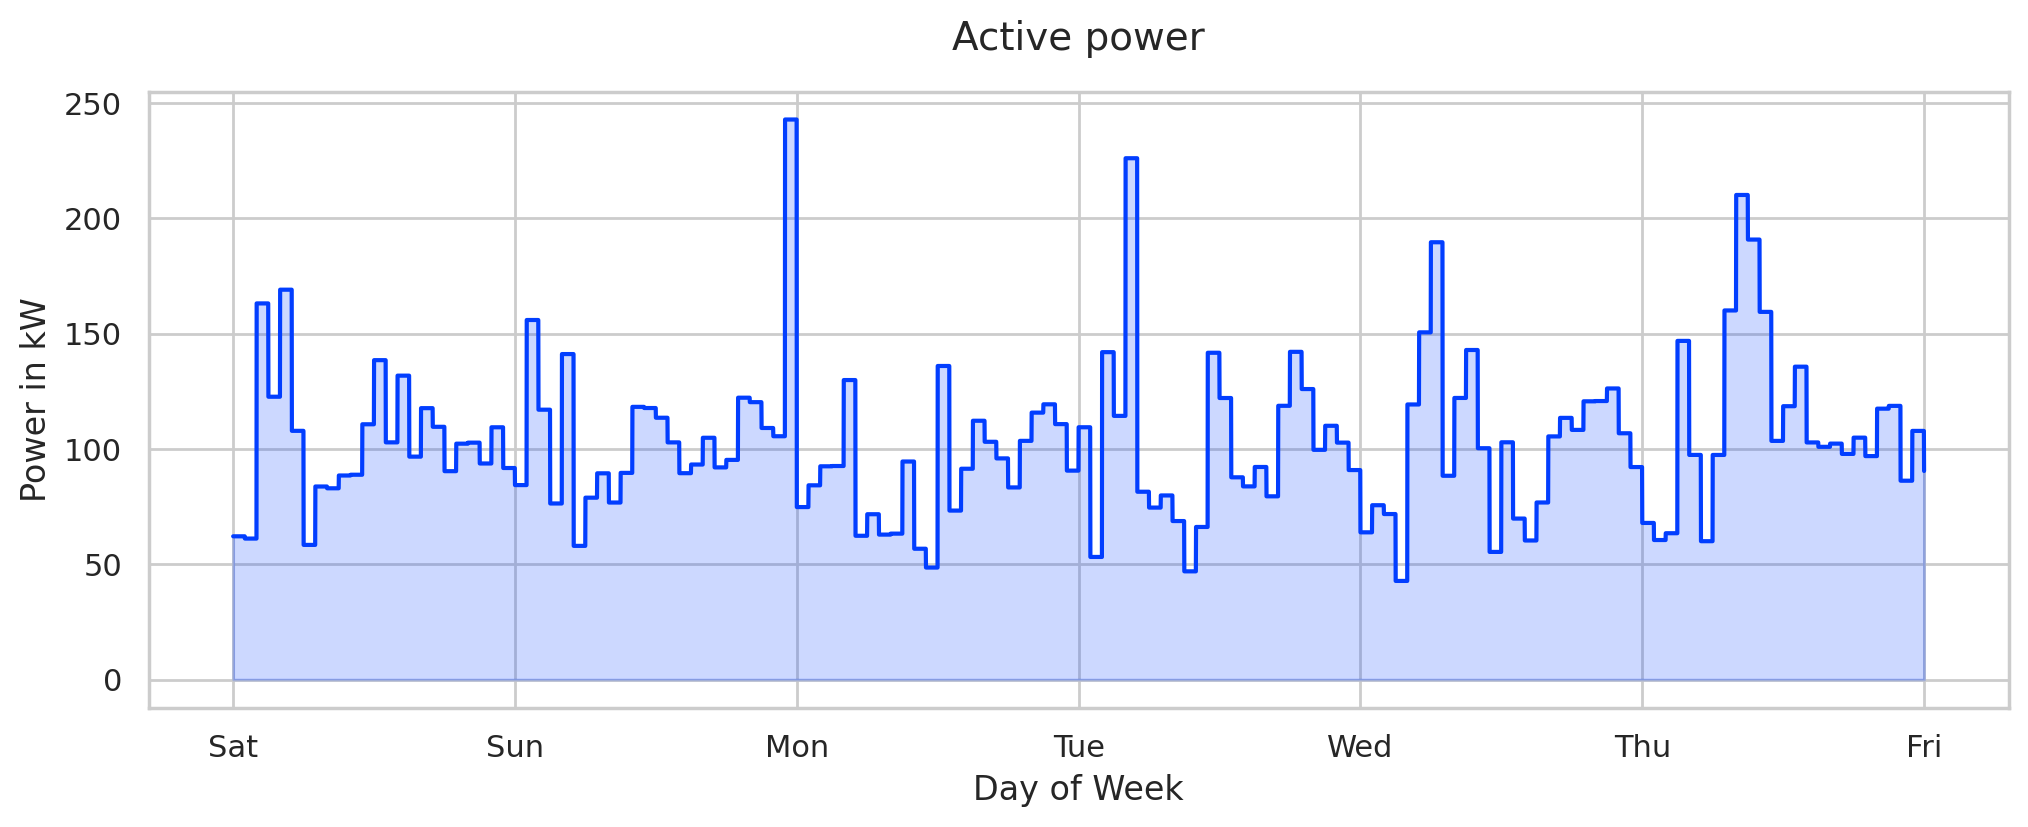

In [ ]:
from pypsdm.plots.common.style import set_sns_style
from pypsdm.plots.results.power import plot_active_power


# You can set the seaborn style for nicer styling
set_sns_style()

load_uuid = list(gwr.loads_res.keys())[0]
load_res = gwr.loads_res[load_uuid]

# The resolution is used to set sensible x-axis labels
# Will hopefully be automated in the future so the parameter becomes optional
plot_active_power(load_res, resolution="w")

(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Active power'}, xlabel='Time in h', ylabel='Power in kW'>)

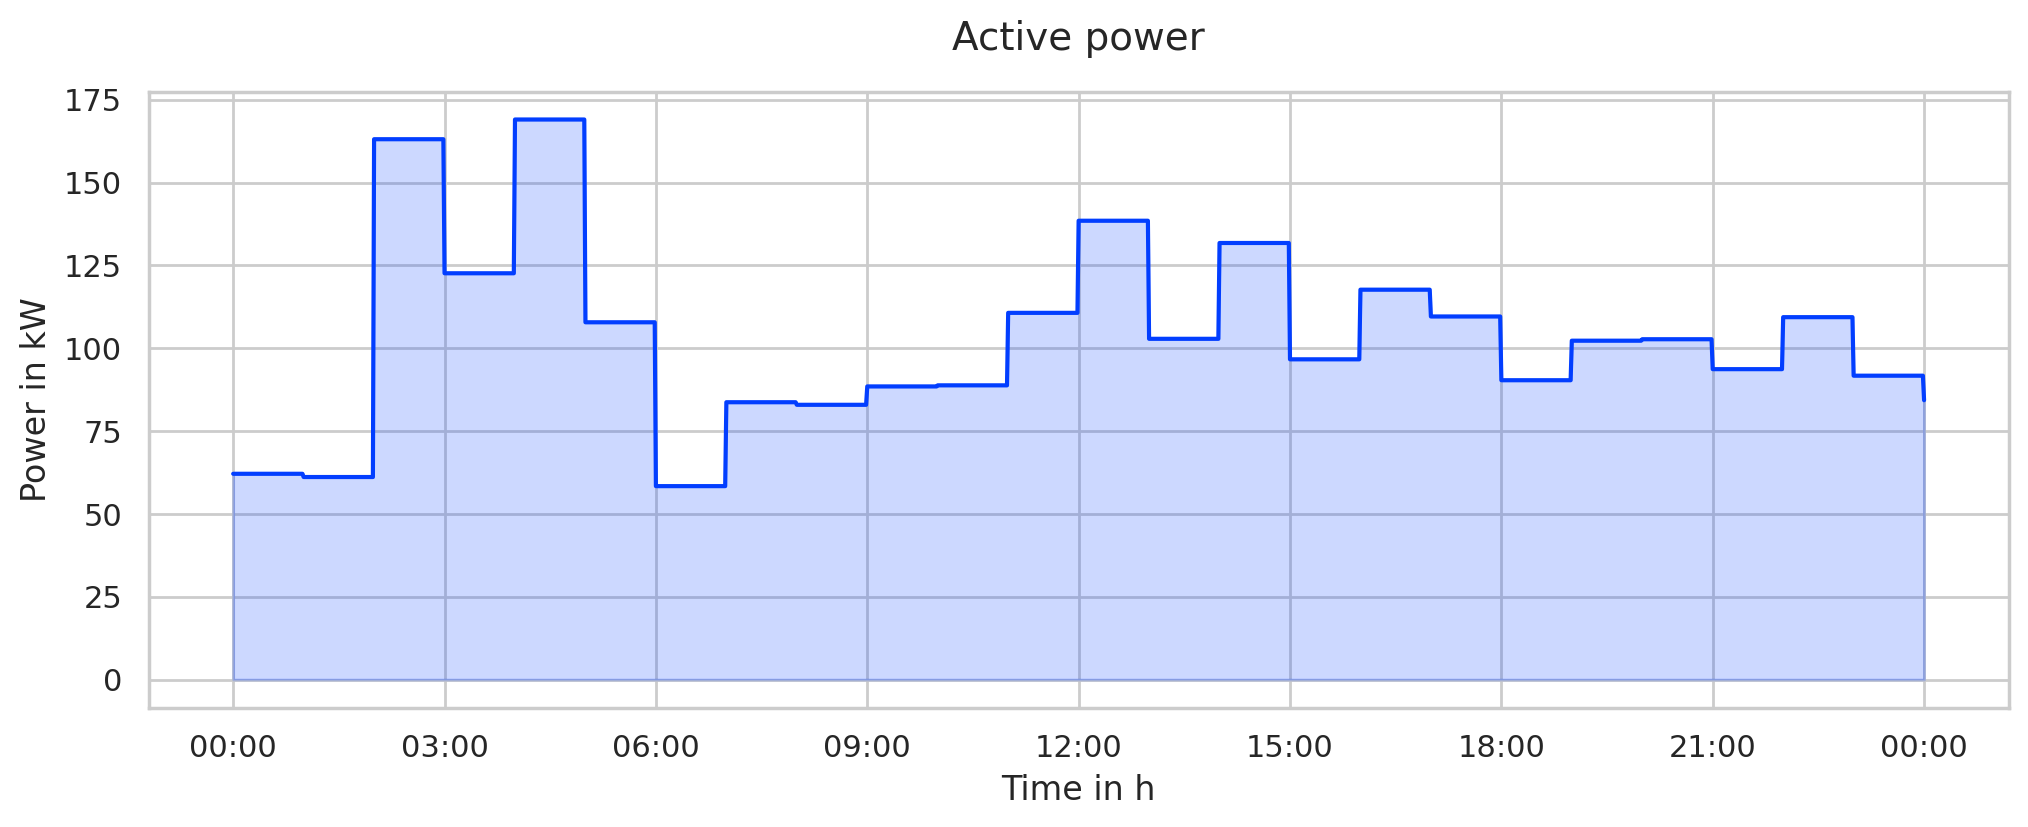

In [ ]:
from datetime import datetime


# Remember that you can slice result models to investigate certain time periods
start = datetime(2016, 1, 2)
end = datetime(2016, 1, 3)
sliced_load_res = load_res[start:end]
plot_active_power(sliced_load_res, resolution="d")

(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Active power'}, xlabel='Day of Week', ylabel='Power in kW'>)

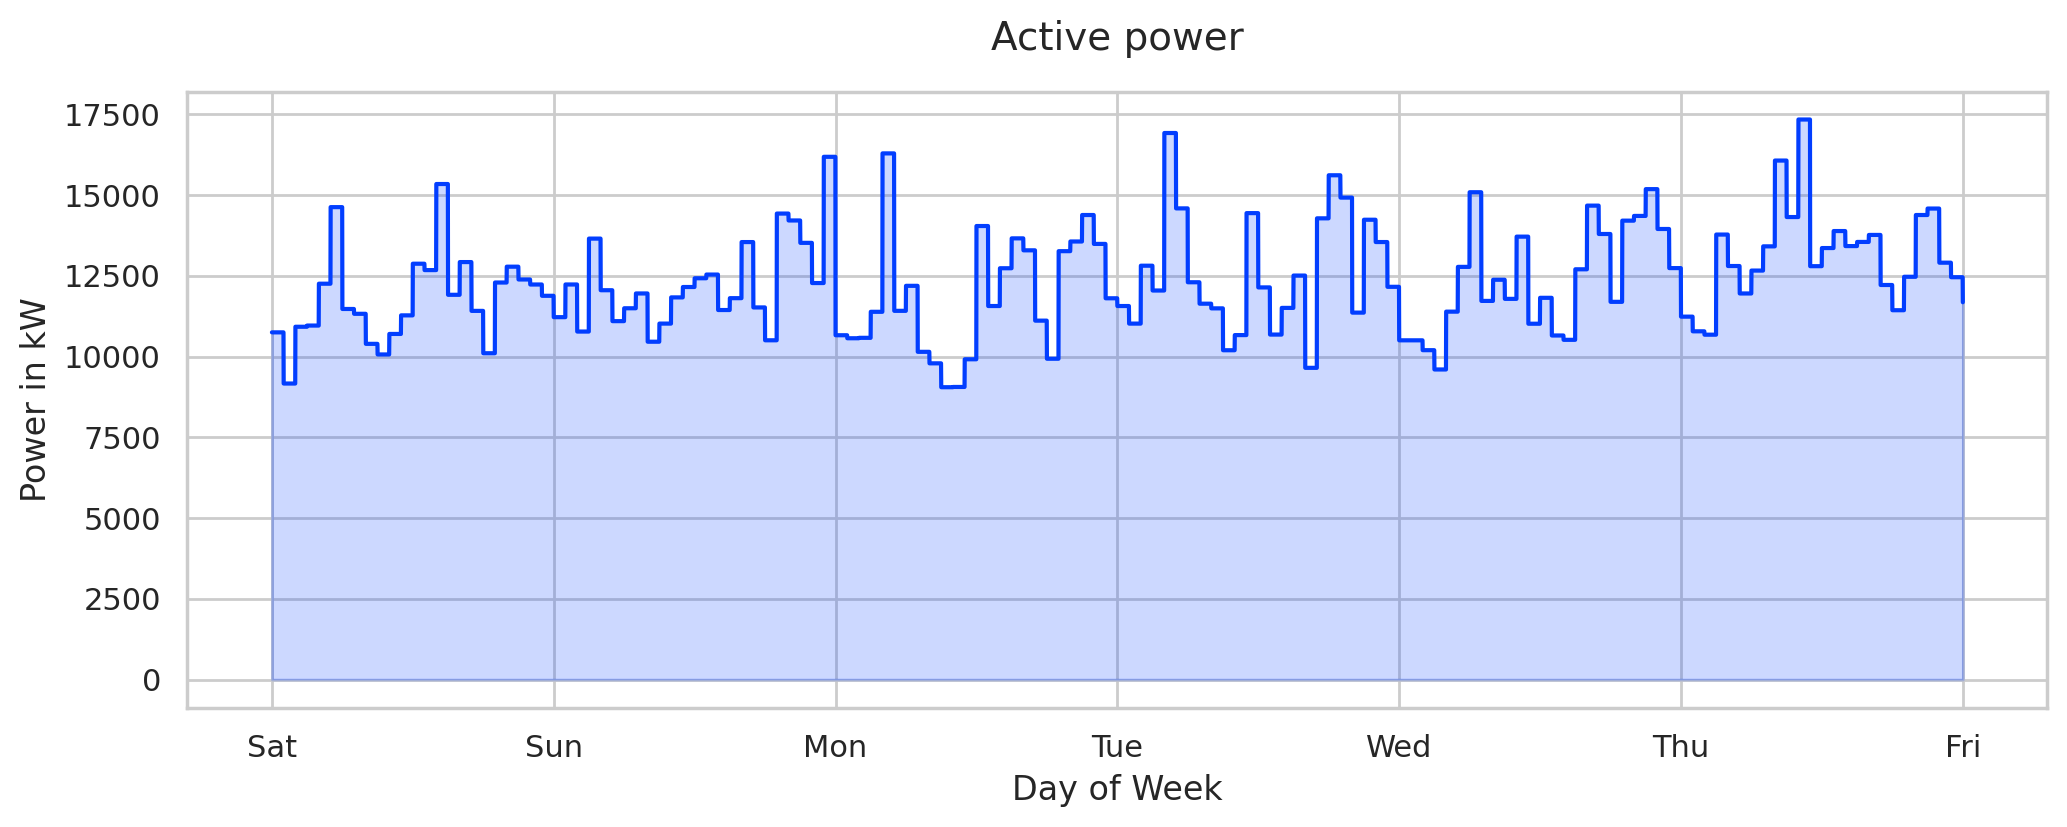

In [ ]:
# Also remember that you can sum up a set of participants
total_load_res = gwr.loads_res.sum()
plot_active_power(total_load_res, resolution="w")

## Compose Plots


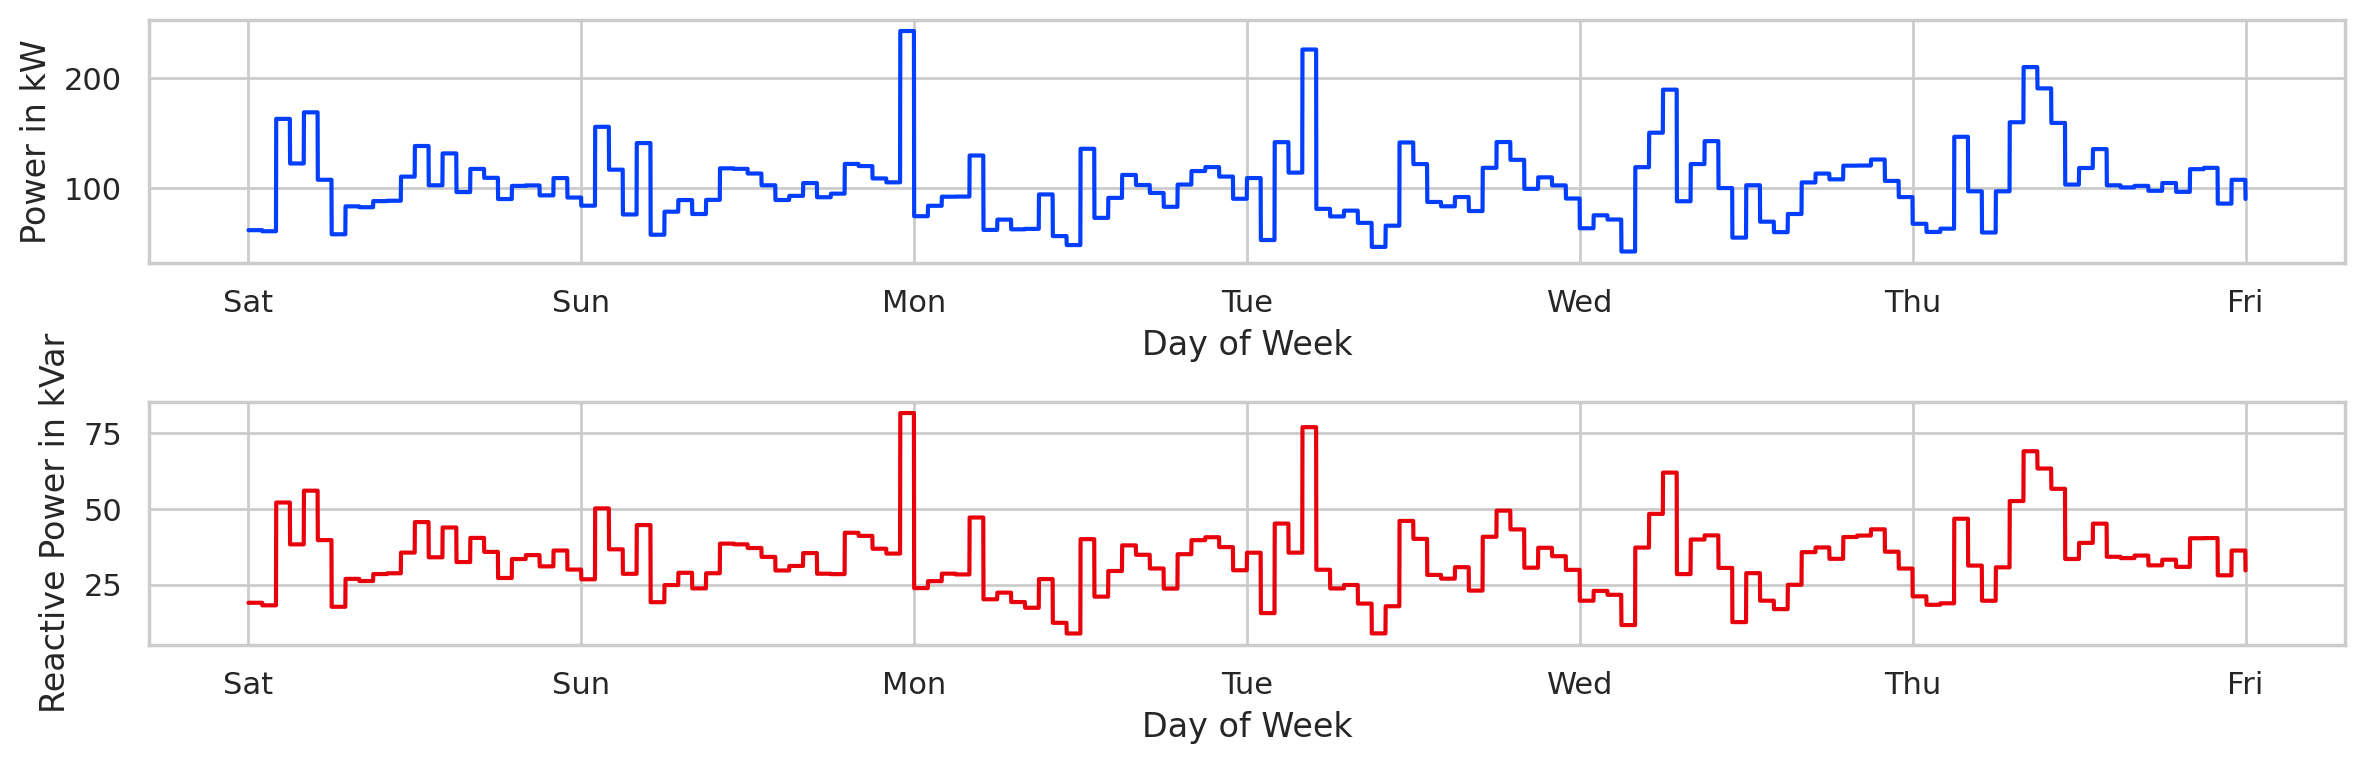

In [ ]:
import matplotlib.pyplot as plt
from pypsdm.plots.common.utils import FIGSIZE
from pypsdm.plots.results.power import ax_plot_active_power, ax_plot_reactive_power


# Most plotting functions use a lower level function with an ax_ prefix under the hood which you can use to compose different plots
# this method takes your axes object and draws the plot on it
fig, axs = plt.subplots(2, figsize=FIGSIZE)
ax1 = ax_plot_active_power(axs[0], load_res, resolution="w")
# note that you can pass kwargs that are passed to the underlying plotting method
ax2 = ax_plot_reactive_power(axs[1], load_res, resolution="w", color=RED)
fig.tight_layout()

## More Complex Plots


Here are some example for more complex plots. These are just a subset of all kinds of plots.
Feel free to check out all the plot methods in `pypsdm/plots`


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Aggregated Load and Generation'}, xlabel='Day of Week', ylabel='Power in kW'>,
        <Axes: xlabel='Day of Week', ylabel='Power in kW'>], dtype=object))

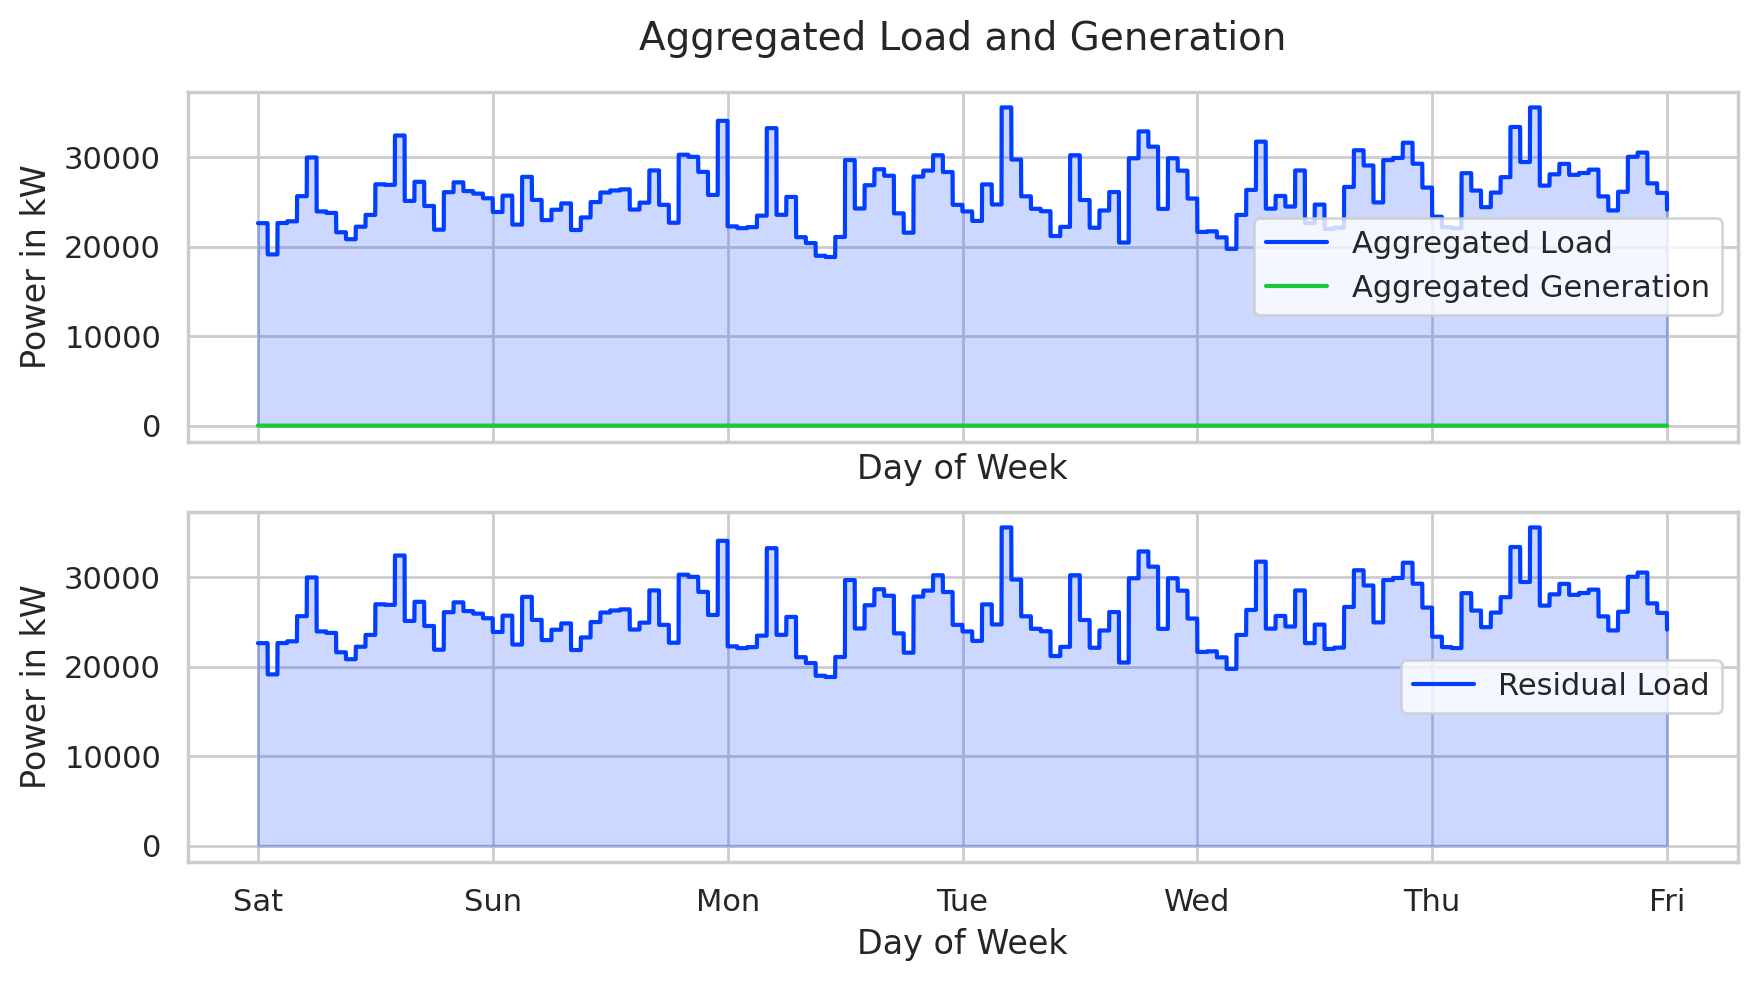

In [ ]:
from pypsdm.plots.results.power import plot_aggregated_load_and_generation

# This of course would be more interesting when we actually had some generation
plot_aggregated_load_and_generation(gwr.participants_res, resolution="w")

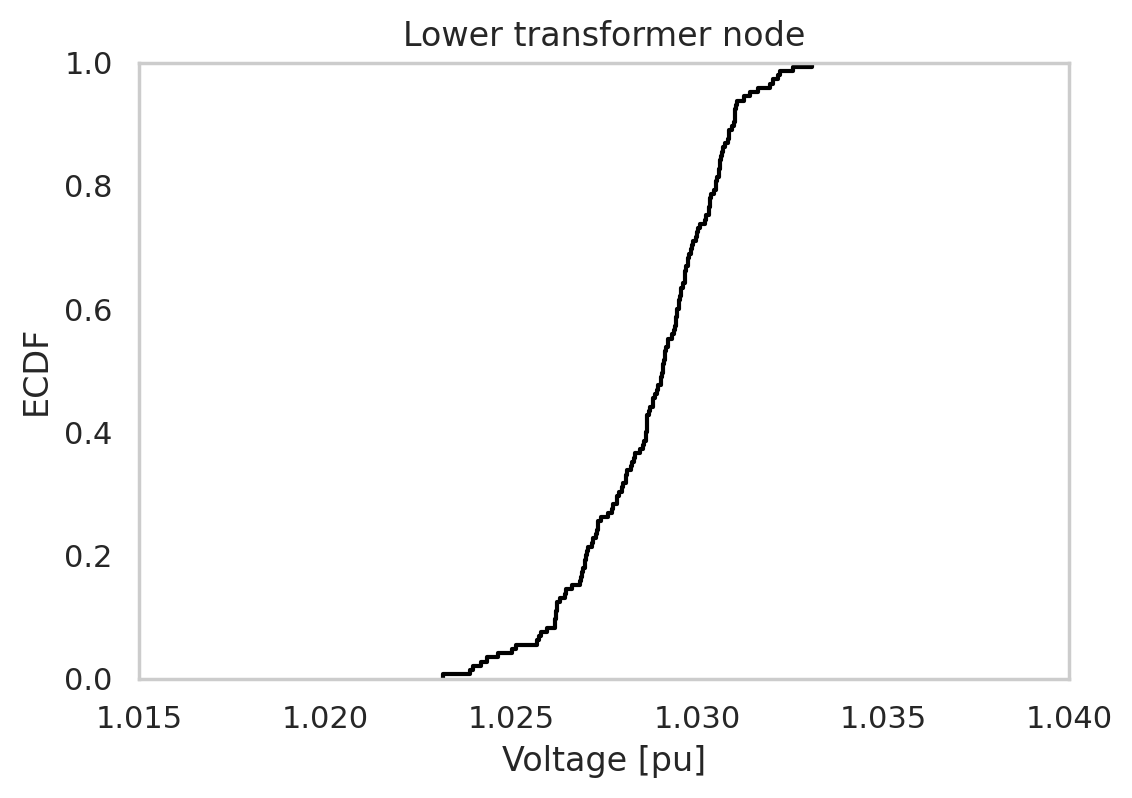

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.title("Lower transformer node")

possible_linestyles = ["solid", "dotted", "dashed", "dashdot"]
linestyles = iter(possible_linestyles)

# lower transformer node
node_uuid = gwr.transformers_2_w.data.iloc[0].node_b

node_res = gwr.nodes_res[node_uuid].v_mag
plt.ecdf(node_res, color="black", linestyle=next(linestyles))

plt.xlim([1.015, 1.04])
plt.xlabel("Voltage [pu]")
plt.ylabel("ECDF")

plt.grid()

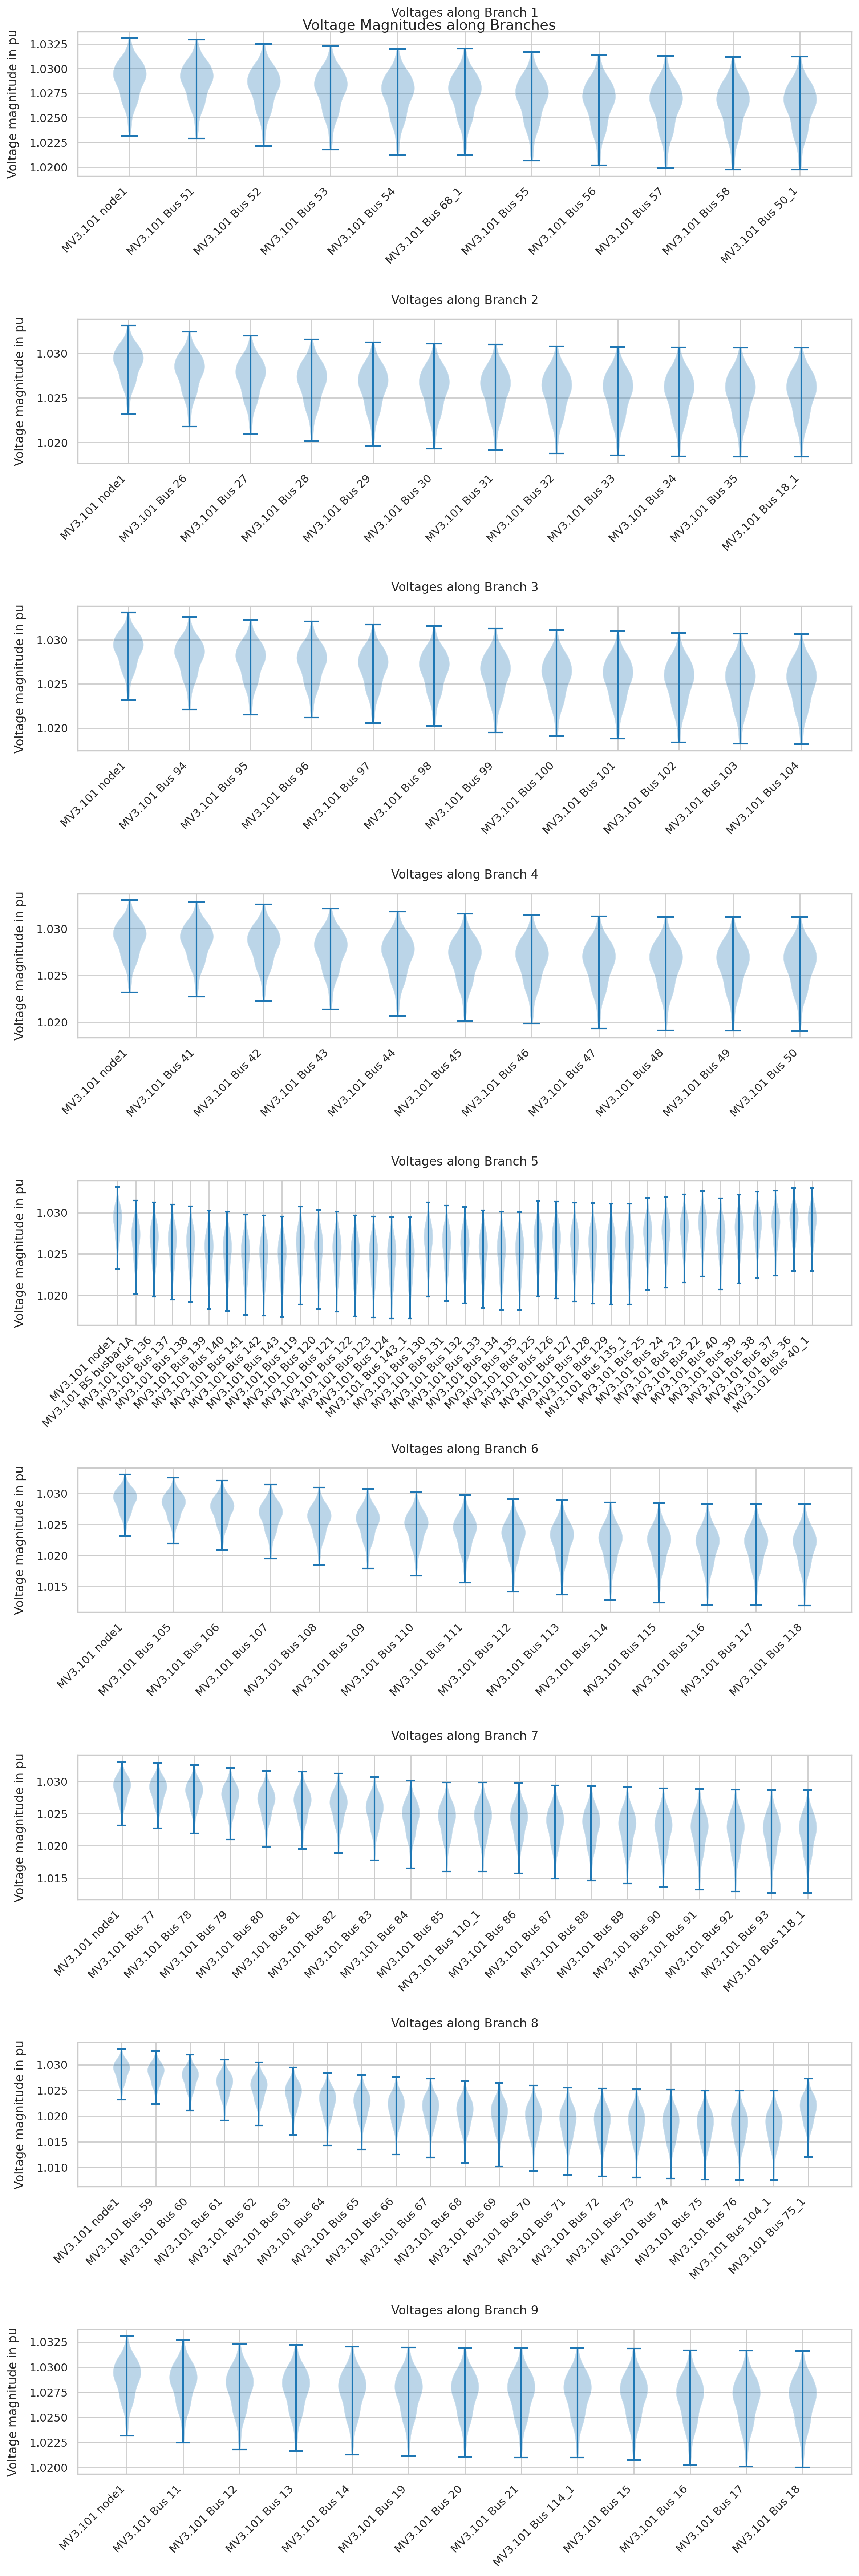

In [ ]:
from pypsdm.plots.results.voltage import plot_all_v_mag_branch_violin


# We can plot all the voltage distribution along the branches of the grid with:
branches = gwr.raw_grid.get_branches()
_ = plot_all_v_mag_branch_violin(gwr.nodes_res, branches)  # type: ignore